## Transforming the data for the model
<p>
<b>Model1</b> will be predicting house price in 2010 based on data from previous years. Data from 2010 will not be included in EDA or calculations for new columns.</p>
<p>
This model is only looking at dimensions that are <b>NOT renovateable</b>(easily) as described by the task. Eg, neighbourhood, lot size, number/size of garages, bathrooms, etc.</p>
<p>
Logically, these dimensions cannot be used to predict house value <b>completely</b>, as house quality must play a role in house price. Renovating houses and reselling is the basis of the proposed business model.</p>
<p>
Thus, we cannot expect <b>Model1</b> to predict the house prices with great accuracy based on not renovateable aspects alone. We are not aiming to get an accuracy close to 100%, but higher is better.</p>
<p>
<b>Model2</b> will attempt to give a better prediction with the addition of some <b>renovateable</b> variables.

In [82]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import csv


plt.style.use('bmh')
sns.set_style('whitegrid')

pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 2000)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%autosave 10

Autosaving every 10 seconds


In [56]:
house = pd.read_csv('./housing.csv')

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
house.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [58]:
house.loc[house.MSZoning  == 'C (all)']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,523,115,0,0,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
557,558,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,6,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,637,Unf,0,0,637,GasA,Gd,Y,SBrkr,897,439,0,1336,0,0,1,1,3,1,TA,7,Typ,0,NaN,CarPort,1994.0,Unf,1,570,TA,TA,Y,0,47,120,0,0,0,NaN,NaN,NaN,0,9,2006,COD,Normal,108000
711,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,7,1900,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Stone,TA,TA,Mn,Unf,0,Unf,0,859,859,GasA,Gd,Y,SBrkr,859,319,0,1178,0,0,1,0,2,1,TA,7,Typ,0,NaN,Detchd,1964.0,RFn,1,384,TA,TA,N,68,0,98,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,540,540,GasA,TA,N,FuseA,1044,0,0,1044,0,0,1,0,2,1,Fa,4,Typ,0,NaN,Basment,1952.0,Unf,2,504,TA,TA,N,0,0,0,0,0,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,NaN,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1279,1280,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,

In [59]:
house = house.loc[house.MSZoning  != 'C (all)']
house.MSZoning.unique()


array(['RL', 'RM', 'FV', 'RH'], dtype=object)

In [60]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1450.000000,1191.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1442.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1371.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,731.364138,56.903448,70.052897,10523.831724,6.114483,5.582069,1971.593103,1985.049655,104.404300,445.162759,46.870345,567.375862,1059.408966,1164.773103,347.394483,5.531034,1517.698621,0.427586,0.057241,1.568966,0.384828,2.870345,1.046207,6.522069,0.616552,1978.627279,1.770345,473.277931,94.826897,46.537931,21.536552,3.433103,15.096552,2.777931,43.365517,6.312414,2007.812414,181654.942069
std,421.554345,42.265033,24.301013,10012.185355,1.372860,1.107330,30.022696,20.552319,181.486539,456.353871,161.828458,442.584978,439.207322,386.646095,437.094261,46.932966,525.154207,0.519394,0.238249,0.549549,0.503450,0.814645,0.219643,1.625324,0.644991,24.592779,0.745136,212.687621,125.560863,65.222761,60.838826,29.416948,55.893399,40.315051,497.636495,2.698244,1.326321,79176.485241
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,37900.000000
25%,366.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.500000,0.000000,0.000000,1131.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,731.500000,50.000000,70.000000,9496.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,475.000000,992.000000,1088.000000,0.000000,0.000000,1466.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163945.000000
75%,1096.750000,70.000000,80.000000,11613.500000,7.000000,6.000000,2001.000000,2004.000000,166.750000,713.750000,0.000000,808.000000,1301.500000,1392.000000,728.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [85]:
# #CRAZY EXPERIMENT#
# houseX = pd.get_dummies(house)
# houseX.head()

In [84]:
# #CRAZY EXPERIMENT continued.... this might break python#
# ---------------------- IT DID ----------------------


# # change df to your DataFrame name. if needed, drop columns here.
# mean_corr = houseX.corr()

# # Set the default matplotlib figure size to 20x14 OR WHATEVER.
# fix, ax = plt.subplots(figsize=(40,30))

# # Generate a mask for the upper triangle(taken from seaborn example gallery)
# mask = np.zeros_like(mean_corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Assign the matplotlib axis the function returns. This will let us resize the labels.
# ax = sns.heatmap(mean_corr, mask=mask, ax=ax, annot=True, cmap='RdBu', vmin=-1, vmax=1)

# # Resize and rotate the labels
# ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=16, rotation=90)
# ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=16, rotation=0)

# # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
# plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [61]:
#house.info()

In [62]:
house1 = house[[
    'SalePrice', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Neighborhood', 'YrSold',
    'LotArea', 'MSZoning', 'BldgType', 'HouseStyle', 'YearBuilt', 'GrLivArea',
    'GarageArea', 'GarageCars', 'TotalBsmtSF', 'Exterior1st', 'CentralAir', 
    'KitchenQual', 'BsmtFinType1', 'OverallCond', 'OverallQual', 'SaleCondition'
]]

house_old = house1[house1.YrSold < 2010]

house_new = house1[house1.YrSold == 2010]

#----------------------------------------------------------------------#
# Reasons for these selections can be found in notebooks
# EDA and model_draft. 
# Only houses sold before 2010 will now be used to add dimesions etc.

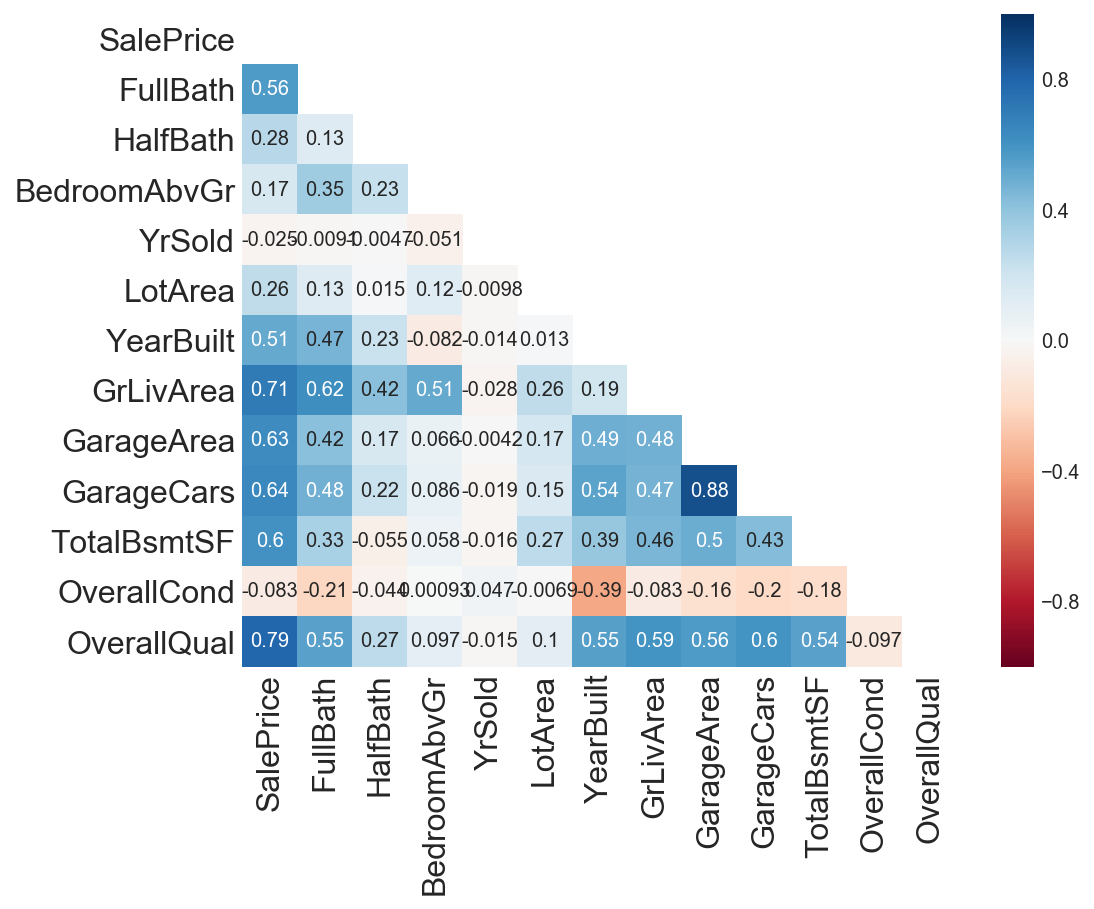

In [63]:
# change df to your DataFrame name. if needed, drop columns here.
mean_corr = house_old.corr()

# Set the default matplotlib figure size to 20x14 OR WHATEVER.
fix, ax = plt.subplots(figsize=(8,6))

# Generate a mask for the upper triangle(taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax, annot=True, cmap='RdBu', vmin=-1, vmax=1)

# Resize and rotate the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=16, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=16, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

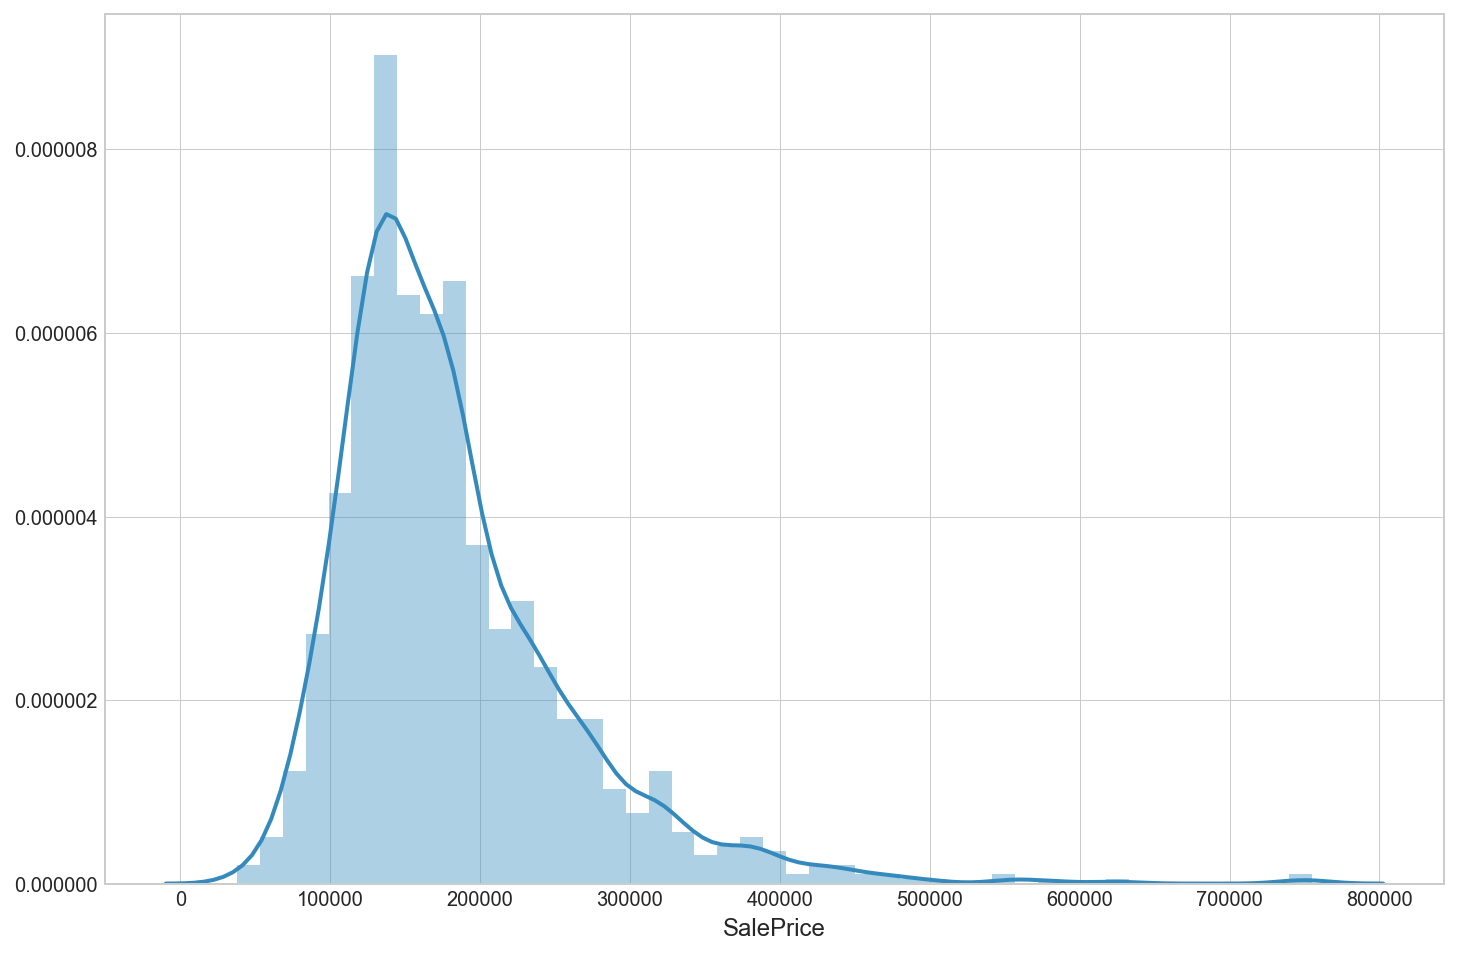

In [64]:
fix, ax = plt.subplots(figsize=(12,8))

ax = sns.distplot(house_old.SalePrice)

count      1278.000000
mean     181989.782473
std       79095.208573
min       37900.000000
25%      130000.000000
50%      164945.000000
75%      214375.000000
max      755000.000000
Name: SalePrice, dtype: float64


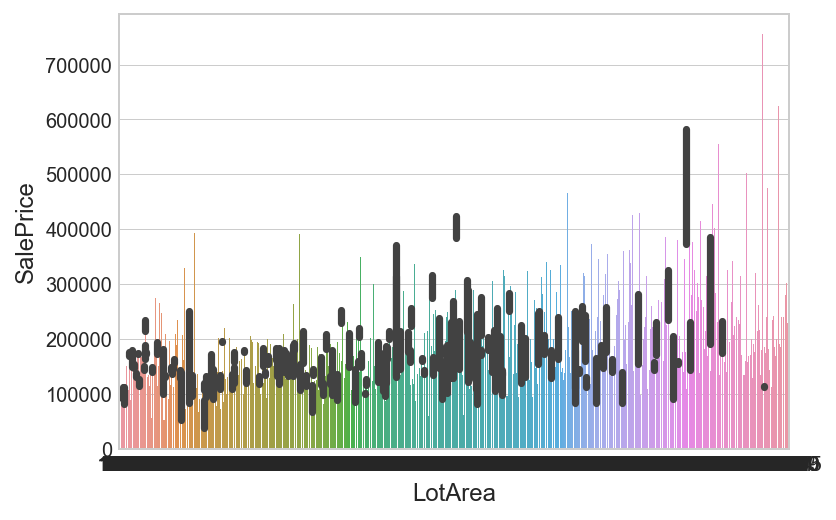

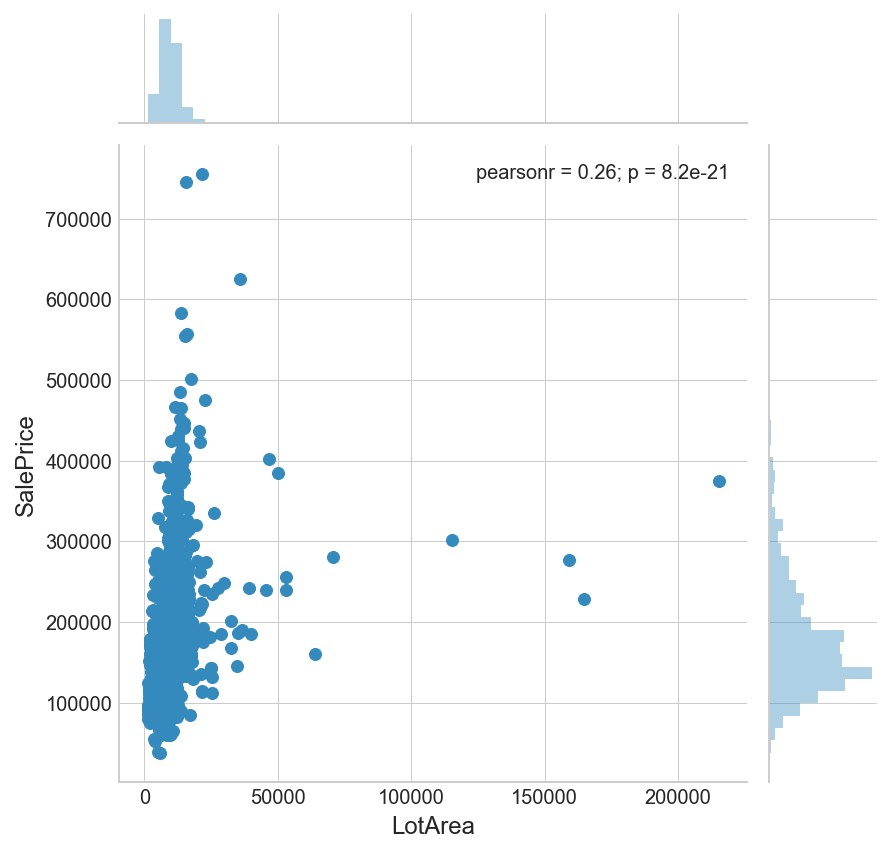

In [65]:
print(house_old.SalePrice.describe())

sns.barplot(x = house_old.LotArea, y = house_old.SalePrice, data = house_old)
sns.jointplot(x = house_old.LotArea, y = house_old.SalePrice, data = house_old)


1Fam      1071
TwnhsE      99
Duplex      45
Twnhs       38
2fmCon      25
Name: BldgType, dtype: int64


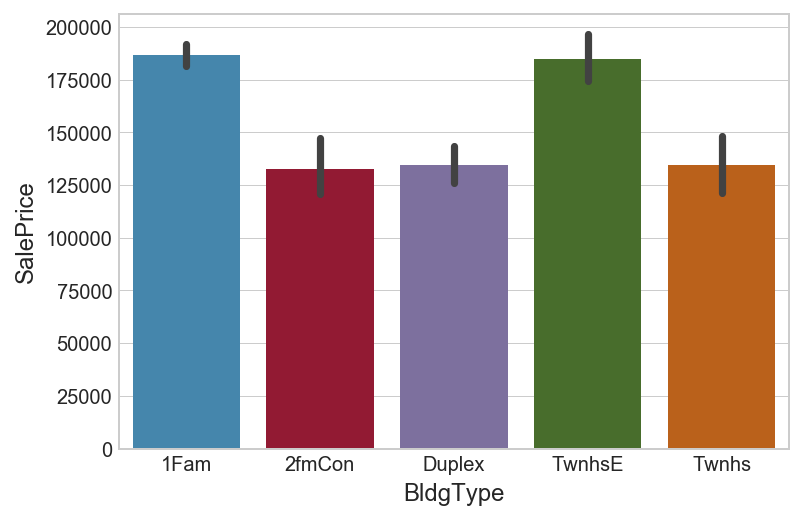

In [66]:
print(house_old.BldgType.value_counts())

sns.barplot(x = house_old.BldgType, y = house_old.SalePrice, data = house_old)

RL    1010
RM     195
FV      57
RH      16
Name: MSZoning, dtype: int64


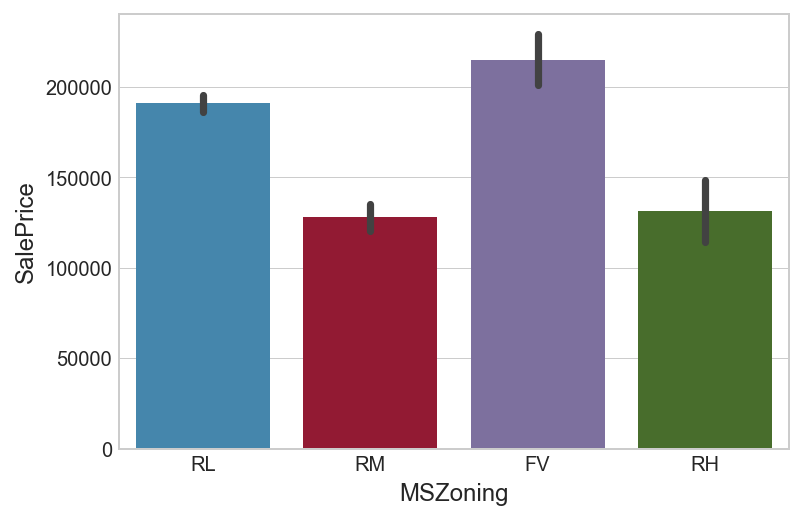

In [67]:
print(house_old.MSZoning.value_counts())

sns.barplot(x = house_old.MSZoning, y = house_old.SalePrice, data = house_old)

NAmes      192
CollgCr    137
OldTown     98
Edwards     89
Somerst     78
Gilbert     73
NridgHt     69
NWAmes      66
Sawyer      58
BrkSide     56
Crawfor     48
SawyerW     46
Mitchel     45
NoRidge     34
Timber      33
IDOTRR      25
ClearCr     24
SWISU       22
StoneBr     20
Blmngtn     16
BrDale      15
MeadowV     14
Veenker     11
NPkVill      7
Blueste      2
Name: Neighborhood, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

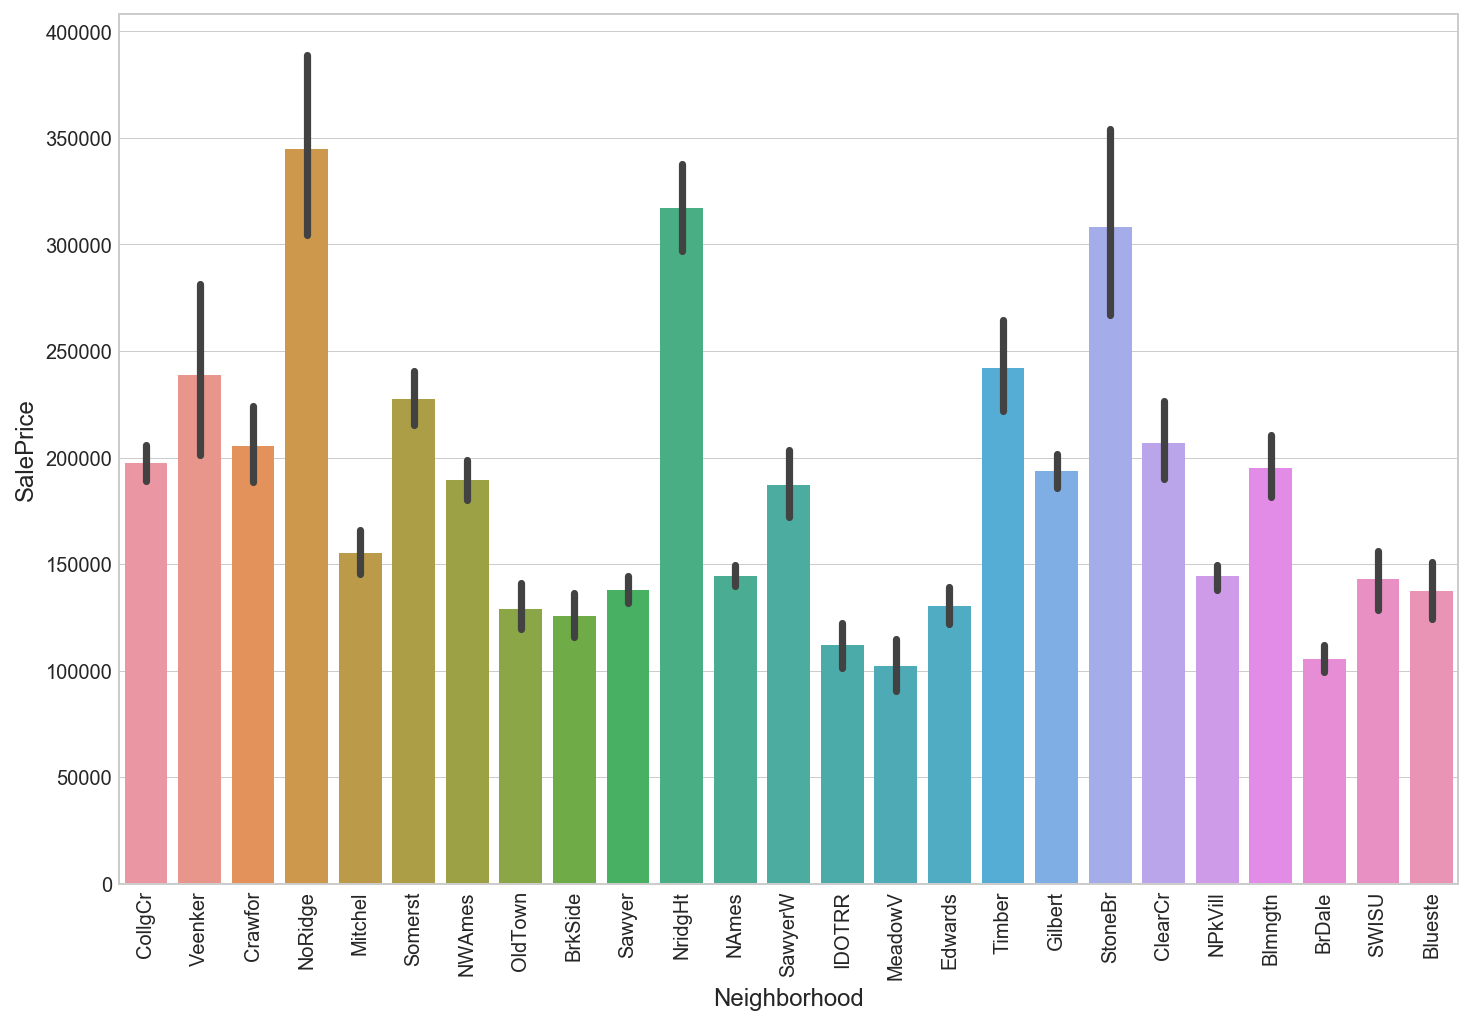

In [68]:
print(house_old.Neighborhood.value_counts())

plt.subplots(figsize=(12,8))
sns.barplot(x = house_old.Neighborhood, y = house_old.SalePrice, data = house_old)
plt.xticks(rotation=90)

In [69]:
house_old.groupby(['Neighborhood'])['SalePrice'].mean().rank()

#-----------------------------------------------------------------------------#
#NOTE this is using house_old 
#(ie. pre 2010 data only to rank the neighbourhoods by average sale price)
# However, these ranks will now be inserted into the FULL dataframe.
# But they are based only on pre 2010 data.

Neighborhood
Blmngtn    16.0
Blueste     7.0
BrDale      2.0
BrkSide     4.0
ClearCr    19.0
CollgCr    17.0
Crawfor    18.0
Edwards     6.0
Gilbert    15.0
IDOTRR      3.0
MeadowV     1.0
Mitchel    12.0
NAmes      11.0
NPkVill    10.0
NWAmes     14.0
NoRidge    25.0
NridgHt    24.0
OldTown     5.0
SWISU       9.0
Sawyer      8.0
SawyerW    13.0
Somerst    20.0
StoneBr    23.0
Timber     22.0
Veenker    21.0
Name: SalePrice, dtype: float64

In [70]:
#house1['hoodrank'] = house_old.Neighborhood.map(dict(df_grouped))

df_grouped = house_old.groupby(['Neighborhood'])['SalePrice'].mean().rank()

df_grouped

Neighborhood
Blmngtn    16.0
Blueste     7.0
BrDale      2.0
BrkSide     4.0
ClearCr    19.0
CollgCr    17.0
Crawfor    18.0
Edwards     6.0
Gilbert    15.0
IDOTRR      3.0
MeadowV     1.0
Mitchel    12.0
NAmes      11.0
NPkVill    10.0
NWAmes     14.0
NoRidge    25.0
NridgHt    24.0
OldTown     5.0
SWISU       9.0
Sawyer      8.0
SawyerW    13.0
Somerst    20.0
StoneBr    23.0
Timber     22.0
Veenker    21.0
Name: SalePrice, dtype: float64

In [71]:
# not working for some reason, and no time to fix now

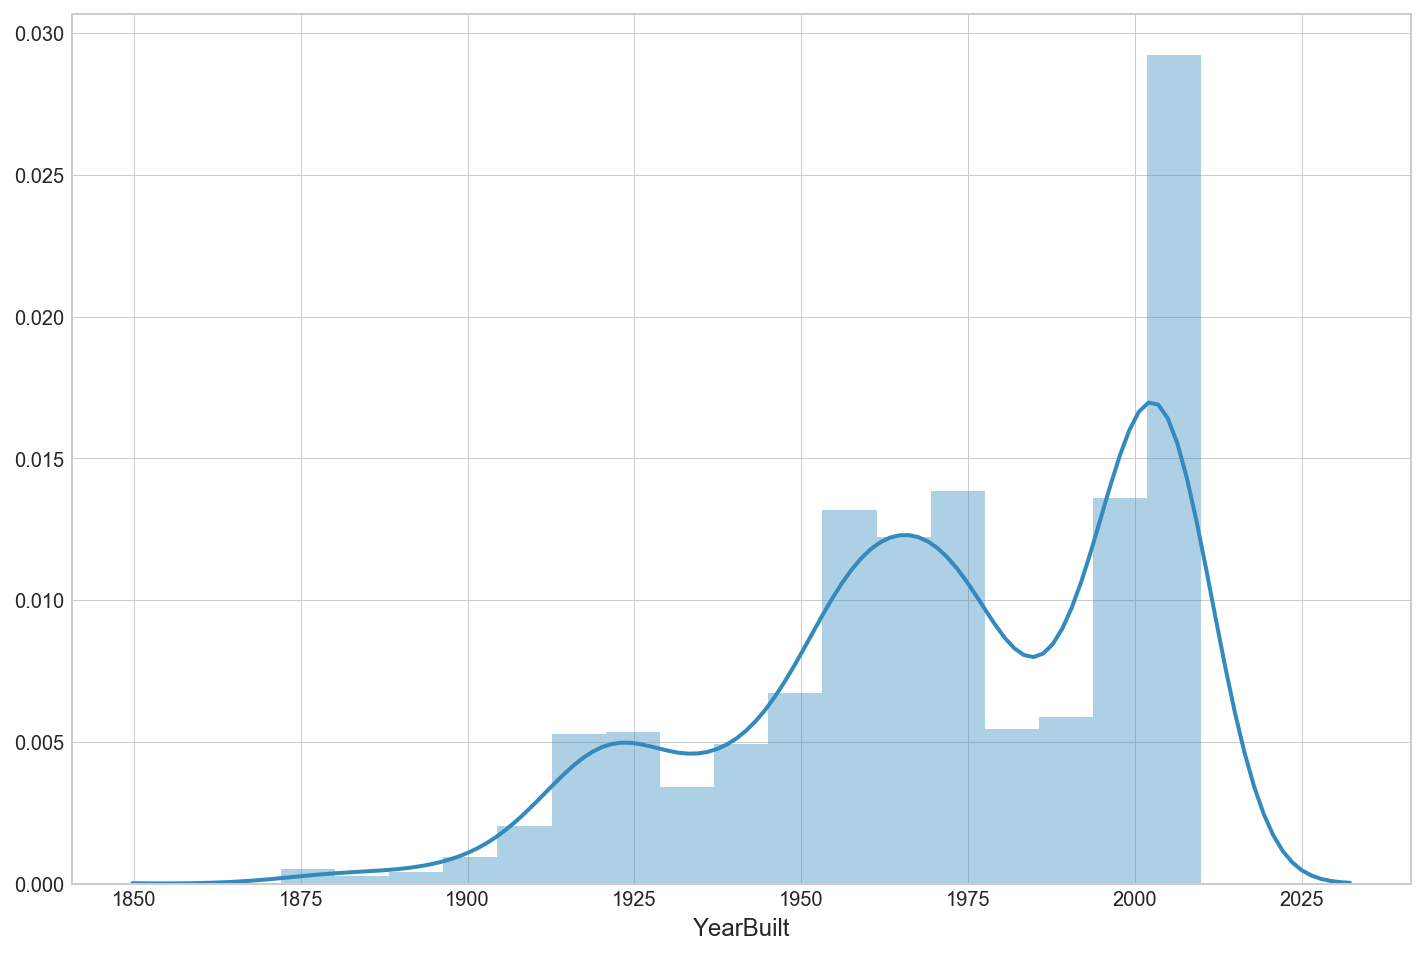

In [72]:
fix, ax = plt.subplots(figsize=(12,8))

ax = sns.distplot(house1.YearBuilt)

In [73]:
#print(house1.YearBuilt.value_counts())

house1['age'] = 2010 - house1['YearBuilt']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
house1.head()
#house1.info()

,SalePrice,FullBath,HalfBath,BedroomAbvGr,Neighborhood,YrSold,LotArea,MSZoning,BldgType,HouseStyle,YearBuilt,GrLivArea,GarageArea,GarageCars,TotalBsmtSF,Exterior1st,CentralAir,KitchenQual,BsmtFinType1,OverallCond,OverallQual,SaleCondition,age
0,208500,2,1,3,CollgCr,2008,8450,RL,1Fam,2Story,2003,1710,548,2,856,VinylSd,Y,Gd,GLQ,5,7,Normal,7
1,181500,2,0,3,Veenker,2007,9600,RL,1Fam,1Story,1976,1262,460,2,1262,MetalSd,Y,TA,ALQ,8,6,Normal,34
2,223500,2,1,3,CollgCr,2008,11250,RL,1Fam,2Story,2001,1786,608,2,920,VinylSd,Y,Gd,GLQ,5,7,Normal,9
3,140000,1,0,3,Crawfor,2006,9550,RL,1Fam,2Story,1915,1717,642,3,756,Wd Sdng,Y,Gd,ALQ,5,7,Abnorml,95
4,250000,2,1,4,NoRidge,2008,14260,RL,1Fam,2Story,2000,2198,836,3,1145,VinylSd,Y,Gd,GLQ,5,8,Normal,10


## Creating the dummy variables

<h4>FOR MODEL 1</h4><br>
 BUILDING TYPE: <b>FancyHouse</b><br>
BldgType<br>
<b>1</b> for 1Fam or TwnhsE<br>
<b>0</b> otherwise<p>

 2 FLOORS: <b>TallHouse</b><br>
HouseStyle<br>
<b>1</b> for 2Story, 2.5Fin, 2.5Unf<br>
<b>0</b> otherwise<p>
    
 LOWER DENSITY: <b>LessDense</b><br>
MSZoning<br>
<b>1</b> RL, FV<br>
<b>0</b> otherwise<p>

 TOP 5 NEIGHBOURHOODS: <b>Top5</b><br>
Neighborhood<br>
<b>1</b> NoRidge, StoneBr, NridgHt, Timber, Veenker <br>
<b>0</b> otherwise<p>
<h4>FOR MODEL 2</h4><br>
 EXTERIOR: <b>exterior</b><br>
Exterior1st<br>
<b>1</b> CemntBd, VinylSd, Stone, ImStucc <br>
<b>0</b> otherwise<p>

 AIRCON: <b>aircon</b><br>
CentralAir<br>
<b>1</b> Y <br>
<b>0</b> otherwise<p>

 KITCHEN QUALITY: <b>kitQ</b><br>
KitchenQual<br>
<b>1</b> Ex <br>
<b>0</b> otherwise<p>

 BASEMENT FINISH TYPE: <b>BFT</b><br>
BsmtFinType1<br>
<b>1</b> GLQ <br>
<b>0</b> otherwise<p>
<h4>FOR Q3</h4><br>
ABNORMAL: <b>ABNORMAL</b><br>
SaleCondition<br>
<b>1</b> Abnormal <br>
<b>0</b> otherwise<p>

In [75]:
# 'Exterior1st', 'CentralAir', 'KitchenQual', 'BsmtFinType1'
# 'exterior', 'aircon', 'kitQ', 'BFT'

In [76]:
houseD = pd.get_dummies(house1)
houseD.head()

,SalePrice,FullBath,HalfBath,BedroomAbvGr,YrSold,LotArea,YearBuilt,GrLivArea,GarageArea,GarageCars,TotalBsmtSF,OverallCond,OverallQual,age,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,2,1,3,2008,8450,2003,1710,548,2,856,5,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,181500,2,0,3,2007,9600,1976,1262,460,2,1262,8,6,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
2,223500,2,1,3,2008,11250,2001,1786,608,2,920,5,7,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,140000,1,0,3,2006,9550,1915,1717,642,3,756,5,7,95,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,250000,2,1,4,2008,14260,2000,2198,836,3,1145,5,8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [77]:
#model1
houseD['FancyHouse'] = houseD['BldgType_1Fam'] + houseD['BldgType_TwnhsE']
houseD['TallHouse'] = houseD['HouseStyle_2Story'] + houseD['HouseStyle_2.5Fin'] + houseD['HouseStyle_2.5Unf']
houseD['LessDense'] = houseD['MSZoning_RL'] + houseD['MSZoning_FV']
houseD['Top5'] = houseD['Neighborhood_NoRidge'] + houseD['Neighborhood_StoneBr'] + houseD['Neighborhood_NridgHt'] + houseD['Neighborhood_Timber'] + houseD['Neighborhood_Veenker']
#model2
houseD['exterior'] = houseD['Exterior1st_CemntBd'] + houseD['Exterior1st_VinylSd'] + houseD['Exterior1st_VinylSd'] + houseD['Exterior1st_ImStucc'] + houseD['Neighborhood_Veenker']
houseD['aircon'] = houseD['CentralAir_Y']
houseD['kitQ'] = houseD['KitchenQual_Ex']
houseD['BFT'] = houseD['BsmtFinType1_GLQ']
#Q3
houseD['ABNORMAL'] = houseD['SaleCondition_Abnorml']

houseD.head()

,SalePrice,FullBath,HalfBath,BedroomAbvGr,YrSold,LotArea,YearBuilt,GrLivArea,GarageArea,GarageCars,TotalBsmtSF,OverallCond,OverallQual,age,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,FancyHouse,TallHouse,LessDense,Top5,exterior,aircon,kitQ,BFT,ABNORMAL
0,208500,2,1,3,2008,8450,2003,1710,548,2,856,5,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,2,1,0,1,0
1,181500,2,0,3,2007,9600,1976,1262,460,2,1262,8,6,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,0,0
2,223500,2,1,3,2008,11250,2001,1786,608,2,920,5,7,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,2,1,0,1,0
3,140000,1,0,3,2006,9550,1915,1717,642,3,756,5,7,95,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,1
4,250000,2,1,4,2008,14260,2000,2198,836,3,1145,5,8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,2,1,0,1,0


In [78]:
house_1 = houseD[[
    'SalePrice', 'age', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'YrSold', 
    'Top5', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageArea', 'FancyHouse', 
    'TallHouse', 'LessDense', 'GarageCars', 'TotalBsmtSF', 
    'exterior', 'aircon', 'kitQ', 'BFT', 'OverallCond', 'OverallQual',
    'ABNORMAL'
]]
house_1.head()

,SalePrice,age,FullBath,HalfBath,BedroomAbvGr,YrSold,Top5,LotArea,YearBuilt,GrLivArea,GarageArea,FancyHouse,TallHouse,LessDense,GarageCars,TotalBsmtSF,exterior,aircon,kitQ,BFT,OverallCond,OverallQual,ABNORMAL
0,208500,7,2,1,3,2008,0,8450,2003,1710,548,1,1,1,2,856,2,1,0,1,5,7,0
1,181500,34,2,0,3,2007,1,9600,1976,1262,460,1,0,1,2,1262,1,1,0,0,8,6,0
2,223500,9,2,1,3,2008,0,11250,2001,1786,608,1,1,1,2,920,2,1,0,1,5,7,0
3,140000,95,1,0,3,2006,0,9550,1915,1717,642,1,1,1,3,756,0,1,0,0,5,7,1
4,250000,10,2,1,4,2008,1,14260,2000,2198,836,1,1,1,3,1145,2,1,0,1,5,8,0


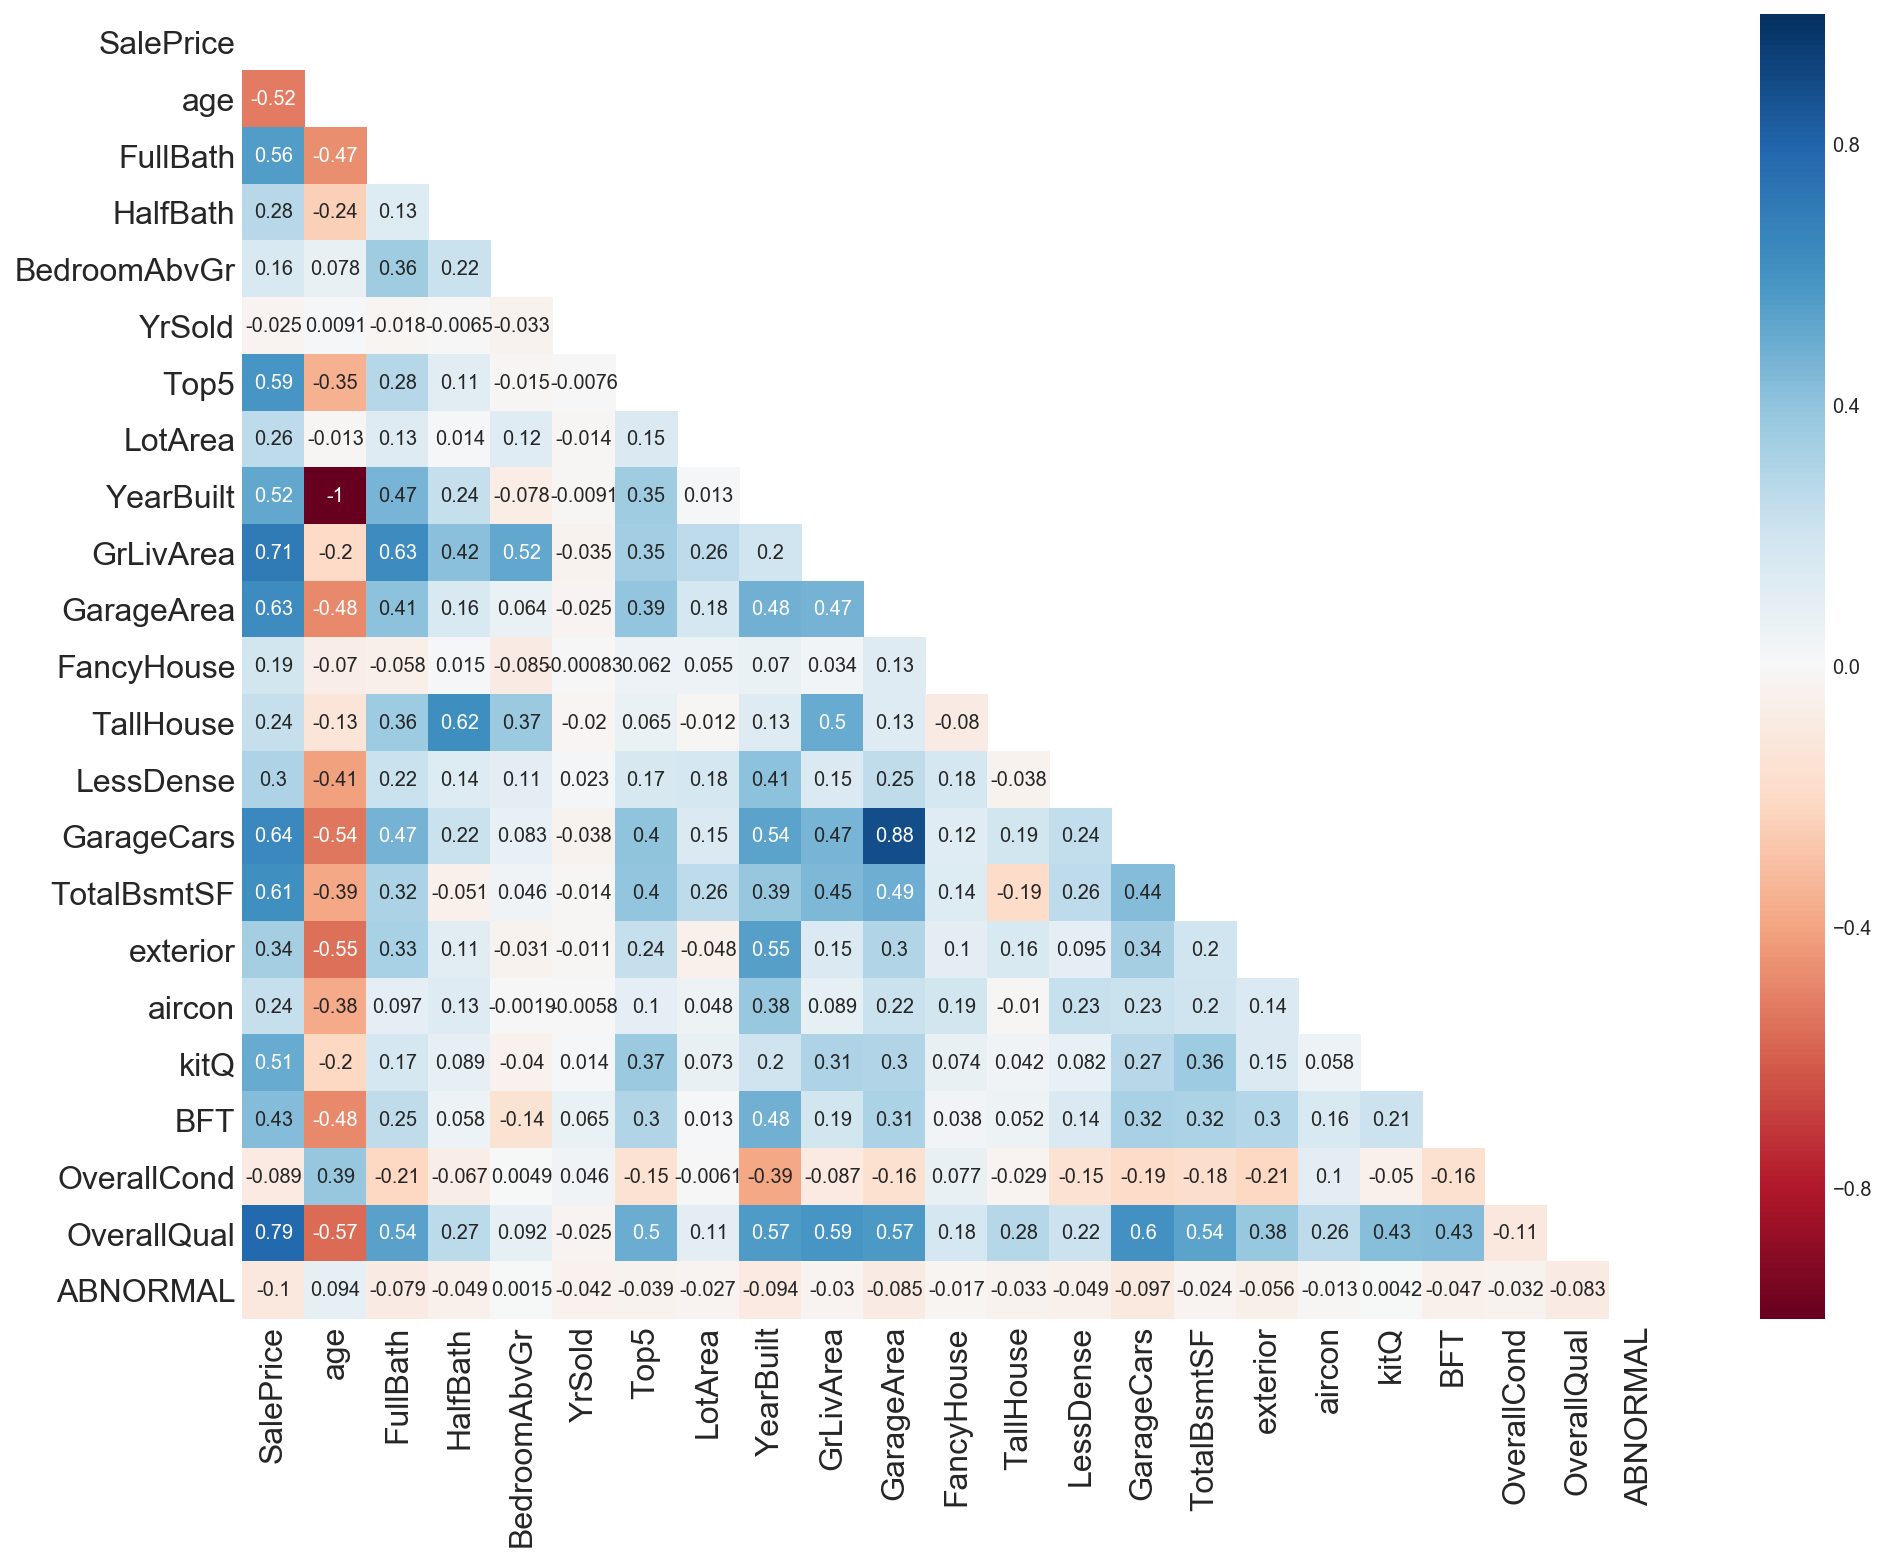

In [79]:
# change df to your DataFrame name. if needed, drop columns here.
mean_corr = house_1.corr()

# Set the default matplotlib figure size to 20x14 OR WHATEVER.
fix, ax = plt.subplots(figsize=(16,12))

# Generate a mask for the upper triangle(taken from seaborn example gallery)
mask = np.zeros_like(mean_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(mean_corr, mask=mask, ax=ax, annot=True, cmap='RdBu', vmin=-1, vmax=1)

# Resize and rotate the labels
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=16, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=16, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

<h3>Answer to Question 1</h3>
As per the heatmap above, "Abnormal" does not appear to be directly correlated to anything.<br>
There is a possibility that it is a combination of conditions though.

In [80]:
# 'OverallQual', 'GrLivArea', 'GarageCars', 'age', 'kitQ', 'BFT', 'FancyHouse', 'Top5'

In [81]:
house_1.to_csv('./house_1.csv')
